# 주제 :사람들의 관심을 끌만한 기사
2019102129 소프트웨어융합학과 정성호

## 1) 프로젝트 목표 및 내용

본 프로젝트가 목표로 하는 것은 기사의 여러 요소들과 사람들의 반응(댓글, 의견을 표현할 수 있는 이모지)의 관계를 분석하는 것이다. 사람들은 어떤 기사에 더 반응하고, 어떤 기사를 작성해야지 한 번이라도 더 해당기사를 보러올 지에 대해 분석해보려고 한다.

## 2) 주제 선정 이유 및 프로젝트의 필요성

본 프로젝트에 1차적으로 영감을 준 요소는 댓글부대라는 영화였다. 일부러 의도한 글을 올려 사람들의 반응을 이끌어냈고, 사람들이 그 글에 이끌려 계속해서 새로운 루머들이 만들어졌다. 이를 통해 사람들의 관심을 끌고 여론을 조작하는 행위가 얼마나 강력하고 위험한지 깨달을 수 있었다. 

현대 사회에서의 정보의 홍수 속에서 사람들이 어떤 기사에 반응하고, 어떤 기사에는 무관심한지에 대한 연구가 중요하다. 이는 단순히 관심 유도 이상의 의미를 지닌다. 의도적으로 시민들을 특정 방향으로 유도하고, 여론을 조작하려는 시도는 민주주의 사회에서 큰 문제가 될 수 있다. 

## 3) 설정한 가설

#### - 첫번재 가설 : 
명사 위주로 문장을 구성하여 제목으로 쓰면 사람들이 더 많이 반응할 것이다.

- 사람들의 반응을 이끌어내기 위해선 강렬하고 직접적인 메세지가 효과적일 수 있다. 명사를 중심으로 한 제목은 직관적이고 주목받기 쉬워, 기사에 대한 관심을 높이는 데 도움이 될 수 있다. 이러한 방법은 댓글부대에서 의도적으로 자극적인 제목과 내용을 사용하여 사람들의 관심을 끄는 방법과 일맥상통하다.

#### - 두번째 가설 : 
정보를 주는 기사가 분석이 탁월한 기사, 공감이 가는 기사, 흥미진진한 기사들 보다 사람들의 관심을 끌 것이다.

- 정보 전달은 기사의 본질적 역할 중 하나이다. 사람들에게 필요한 정보를 제공함으로써 기사의 유용성을 높일 수 있다. 이는 사람들이 필요로 하는 정보를 제공하여 그들의 관심을 끌고, 이를 통해 여론을 형성할 수 있는 방법이다. 정보의 제공은 단순한 흥미 이상의 가치를 지니고, 사회적으로 중요한 역할을 할 수 있다.

#### - 세번째 가설 : 
기사를 읽고 반응하는데 있어서 신문사는 크게 중요하지 않다.

- 이는 정보의 출처보다는 내용 자체가 중요하다는 가설이다. 주요 신문사든 비주요 신문사든, 사람들이 관심을 가지는 것은 기사 내용의 질과 관련이 있다. 이는 댓글 알바와 같이 출처를 불문하고 내용 자체로 여론을 형성하려는 시도와 관련이 있다. 실제로 댓글 알바는 출처가 불분명한 정보라도 그 내용을 통해 사람들의 반응을 유도하고 여론을 형성하는데, 이는 출처보다 내용의 중요성을 보여준다.

## 4) 가설검정
코드 실행은 5) 전체코드를 먼저 실행해주시기 바랍니다.

### 첫번재 가설 검정
명사 위주로 문장을 구성하여 제목으로 쓰면 사람들이 더 많이 반응할 것이다.

In [40]:
# 가설1 검증에 쓰일 데이터프레임
df_가설_1 = df[['명사 수','댓글 구간']].copy()

# Low, Medium, High를 숫자로 변환
df_가설_1['댓글 구간'] = df_가설_1['댓글 구간'].map({'Low': 0, 'Medium': 1, 'High': 2})

# 특징 변수와 타겟 변수 분리
X = df_가설_1[['명사 수']]
y = df_가설_1['댓글 구간']

In [41]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# 로지스틱 회귀 모델 학습
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [43]:
# 예측
y_pred = logreg_model.predict(X_test_scaled)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("분류 보고서:\n", class_report)

분류 보고서:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73       256
           1       0.00      0.00      0.00        55
           2       1.00      0.01      0.03       140

    accuracy                           0.57       451
   macro avg       0.52      0.34      0.25       451
weighted avg       0.63      0.57      0.42       451



C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


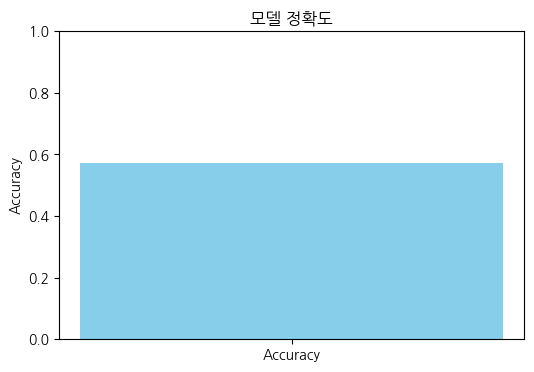

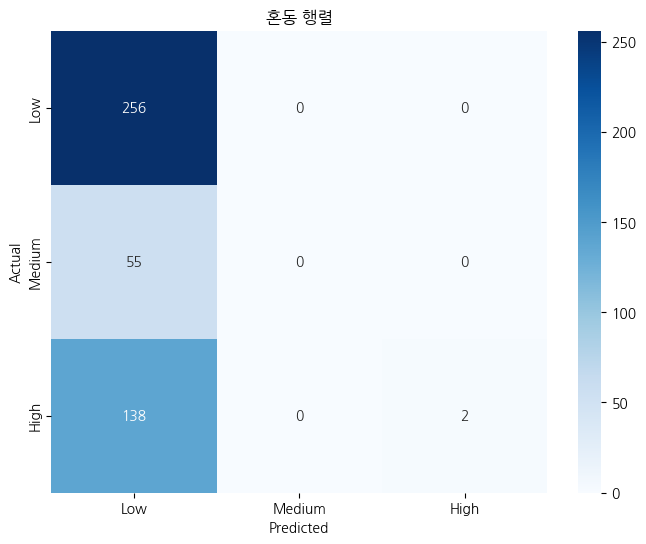

In [44]:
# 정확도 막대그래프
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('모델 정확도')
plt.show()

# 혼동 행렬 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('혼동 행렬')
plt.show()

In [45]:
# High, Medium, Low 그룹 나누기
high_group = df_가설_1[df_가설_1['댓글 구간'] == 2]['명사 수']
medium_group = df_가설_1[df_가설_1['댓글 구간'] == 1]['명사 수']
low_group = df_가설_1[df_가설_1['댓글 구간'] == 0]['명사 수']

# ANOVA 수행
f_stat, p_value = f_oneway(high_group, medium_group, low_group)

# 결과 출력
print("ANOVA 결과 (명사 수): F =", f_stat, ", p =", p_value)

# if p_value < 0.05:
#     print("결과적으로 p-value가 유의수준 0.5보다 작으므로 그룹 간의 평균 반응 수에 통계적으로 유의미한 차이가 있다.")
# else:
#     print("결과적으로 p-value가 유의수준 0.5보다 크므로 그룹 간의 평균 반응 수에 통계적으로 유의미한 차이가 없다.")

ANOVA 결과 (명사 수): F = 9.939659325411654 , p = 5.037545235286215e-05


결과적으로 p-value가 유의수준 0.5보다 작으므로 그룹 간의 평균 반응 수에 통계적으로 유의미한 차이가 있다. 명사 수에 따라 사람들의 관심도에 변화가 생긴다. 

### 두번재 가설 검정
정보를 주는 기사가 분석이 탁월한 기사, 공감이 가는 기사, 흥미진진한 기사들 보다 사람들의 관심을 끌 것이다.

In [46]:
df_가설_2 = df[['쏠쏠정보', '흥미진진', '공감백배', '분석탁월', '후속강추','댓글 구간' ]].copy()

In [47]:
df_가설_2['댓글 구간'] = df_가설_2['댓글 구간'].map({'Low': 0, 'Medium': 1, 'High': 2})

C:\Users\kjeng\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


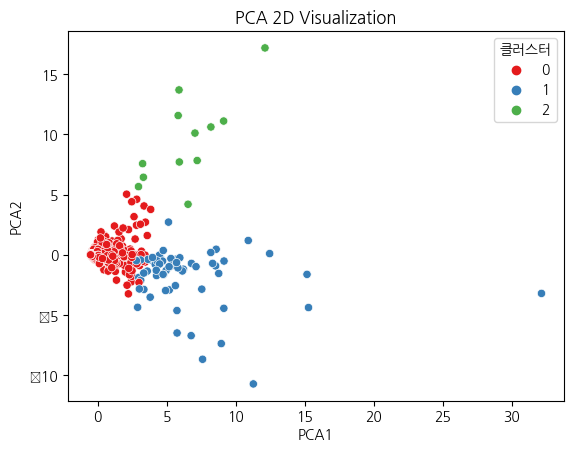

C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\kjeng\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


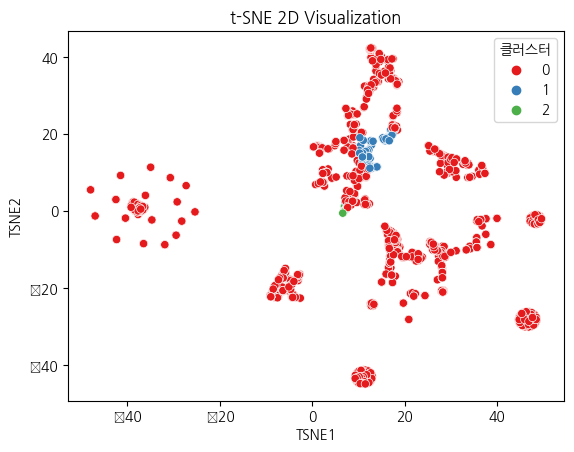

ANOVA 결과 (댓글 수): F = 21.718459080301145 , p = 4.546568879853064e-10


In [48]:
# 사용할 열 선택
features = ['쏠쏠정보', '흥미진진', '공감백배', '분석탁월', '후속강추']
target = ['댓글 구간']

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_가설_2[features])

# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df_가설_2['클러스터'] = kmeans.fit_predict(scaled_features)

# PCA를 사용한 2차원 시각화
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

df_가설_2['PCA1'] = pca_components[:, 0]
df_가설_2['PCA2'] = pca_components[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='클러스터', palette='Set1', data=df_가설_2)
plt.title('PCA 2D Visualization')
plt.show()

# t-SNE를 사용한 2차원 시각화
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)

df_가설_2['TSNE1'] = tsne_components[:, 0]
df_가설_2['TSNE2'] = tsne_components[:, 1]

sns.scatterplot(x='TSNE1', y='TSNE2', hue='클러스터', palette='Set1', data=df_가설_2)
plt.title('t-SNE 2D Visualization')
plt.show()

# ANOVA 검증 (예시)
from scipy.stats import f_oneway

anova_comments = f_oneway(
    df_가설_2[df_가설_2['클러스터'] == 0]['댓글 구간'],
    df_가설_2[df_가설_2['클러스터'] == 1]['댓글 구간'],
    df_가설_2[df_가설_2['클러스터'] == 2]['댓글 구간']
)

print("ANOVA 결과 (댓글 수): F =", anova_comments.statistic, ", p =", anova_comments.pvalue)

PCA 2D Visualizations는 PCA를 통해 2차원으로 차원을 축소한 후 K-means 클러스터링 결과를 시각화 한것이다. 시각화 결과 데이터 포인터들이 각각의 클러스터로 나누어지긴 하지만, 분포가 뚜렷하지 않다. t-SNE 2D visualization는 고차원의 데이터를 2차원으로 축소하여 클러스터 간의 분포를 보여주는데 클러스터 간의 명확한 경계가 뚜렷하지 않다.
따라서 정보를 주는 기사는 분석이 탁월한 기사, 공감이 가는 기사, 흥미진진한 기사들 보다 사람들의 관심을 끌지 못한다.

### 세번재 가설 검정
제안 - 기사를 읽고 반응하는데 있어서 신문사는 크게 중요하지 않다.

In [49]:
# 
df['총 반응이모지 수'] = df['쏠쏠정보'] + df['흥미진진'] + df['공감백배']+df['분석탁월'] + df['후속강추']
df_가설_3 = df[['총 반응이모지 수']+ ['댓글 구간'] + ['댓글 수'] + [col for col in df.columns if '신문사_' in col]]

# 주요 신문사 목록 : 네이버가 지정한 주요 신문사목록
major_newspapers = [
    '신문사_프레시안', '신문사_마이데일리', '신문사_서울경제', '신문사_MBC', '신문사_경향신문', '신문사_중앙일보',
    '신문사_YTN', '신문사_동아일보', '신문사_미디어오늘', '신문사_조선비즈', '신문사_오마이뉴스', '신문사_아이뉴스24',
    '신문사_아시아경제', '신문사_머니투데이', '신문사_디지털타임스', '신문사_매일경제', '신문사_해럴드경제', '신문사_한국경제',
    '신문사_국민일보', '신문사_SBS', '신문사_시사IN', '신문사_한국일보', '신문사_뉴스타파', '신문사_OSEN',
    '신문사_동아일보', '신문사_KBS', '신문사_뉴데일리', '신문사_MBN', '신문사_스포츠서울', '신문사_스포츠동아',
    '신문사_전자신문', '신문사_JTBC', '신문사_스포츠조선', '신문사_일간스포츠', '신문사_서울신문',
    '신문사_파이낸셜뉴스', '신문사_이데일리', '신문사_연합뉴스', '신문사_데일리안', '신문사_한국경제TV',
    '신문사_한겨레'
]

# 데이터프레임에서 실제로 존재하는 주요 신문사 목록 필터링
existing_major_newspapers = [col for col in major_newspapers if col in df_가설_3.columns]

# 주요 신문사 열을 기반으로 'is_major' 열 생성
df_가설_3['is_major'] = df_가설_3[existing_major_newspapers].sum(axis=1) > 0

# 댓글 수 * 1.2 + 총 반응 이모지 수 = 반응
df_가설_3['반응'] = df_가설_3['댓글 수'] + 1.2*df_가설_3['총 반응이모지 수']

# 필요없는 열 탈락
df_가설_3.drop(columns=['댓글 구간', '댓글 수', '총 반응이모지 수'], inplace=True)

# '신문사_'가 포함된 열 확인
columns_to_drop = [col for col in df_가설_3.columns if '신문사_' in col]

# '신문사_'가 포함된 열 삭제
df_가설_3.drop(columns=columns_to_drop, inplace= True)

C:\Users\kjeng\AppData\Local\Temp\ipykernel_48548\364243665.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_가설_3['is_major'] = df_가설_3[existing_major_newspapers].sum(axis=1) > 0
C:\Users\kjeng\AppData\Local\Temp\ipykernel_48548\364243665.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_가설_3['반응'] = df_가설_3['댓글 수'] + 1.2*df_가설_3['총 반응이모지 수']
C:\Users\kjeng\AppData\Local\Temp\ipykernel_48548\364243665.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [50]:
# 주요신문사와 비주요신문사로 데이터 분할
major_group = df_가설_3[df_가설_3['is_major'] == True]
non_major_group = df_가설_3[df_가설_3['is_major'] == False]

In [51]:
major_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 2384
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   is_major  1451 non-null   bool   
 1   반응        1451 non-null   float64
dtypes: bool(1), float64(1)
memory usage: 24.1 KB


In [52]:
# 댓글 수에 대한 t-test
t_stat, p_value = ttest_ind(major_group['반응'], non_major_group['반응'])
print("반응에 대한 t-test 결과: t =", t_stat, ", p =", p_value)

반응에 대한 t-test 결과: t = -0.6656581140692669 , p = 0.505697854198262


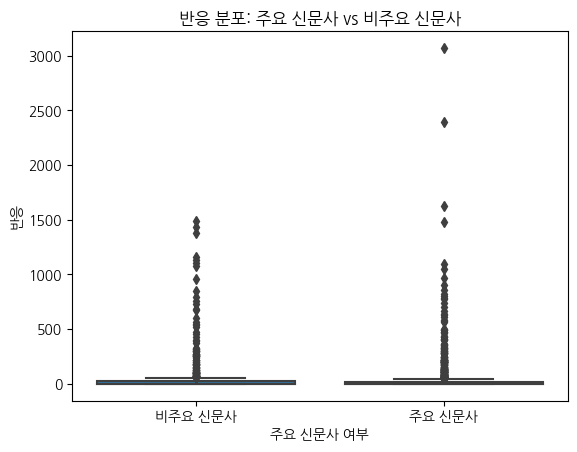

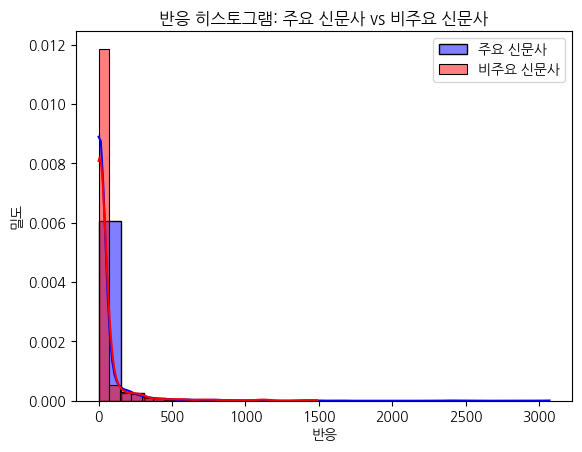

T-test 결과: t-statistic = -0.6706, p-value = 0.5025


In [53]:
# 주요 신문사와 비주요 신문사로 데이터 분리
major_reactions = df_가설_3[df_가설_3['is_major'] == True]['반응']
non_major_reactions = df_가설_3[df_가설_3['is_major'] == False]['반응']

# T-test를 통해 두 그룹 간의 반응 차이 검정
t_stat, p_value = ttest_ind(major_reactions, non_major_reactions, equal_var=False)

# 결과 시각화: 박스플롯
sns.boxplot(x='is_major', y='반응', data=df_가설_3)
plt.title('반응 분포: 주요 신문사 vs 비주요 신문사')
plt.xlabel('주요 신문사 여부')
plt.ylabel('반응')
plt.xticks([0, 1], ['비주요 신문사', '주요 신문사'])
plt.show()

# 결과 시각화: 히스토그램
sns.histplot(major_reactions, color='blue', label='주요 신문사', kde=True, stat="density", bins=20)
sns.histplot(non_major_reactions, color='red', label='비주요 신문사', kde=True, stat="density", bins=20)
plt.title('반응 히스토그램: 주요 신문사 vs 비주요 신문사')
plt.xlabel('반응')
plt.ylabel('밀도')
plt.legend()
plt.show()


# T-test 결과 출력
print(f"T-test 결과: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

#결과 해석 및 결론
# if p_value < 0.05:
#     print("결과: 주류 신문사와 비주류 신문사 간의 반응 차이가 통계적으로 유의미하다.")
#     print("결론: 주류 신문사와 비주류 신문사에 따라 기사의 반응이 달라질 수 있다.")
# else:
#     print("결과: 주류 신문사와 비주류 신문사 간의 반응 차이가 통계적으로 유의미하지 않다.")
#     print("결론: 기사를 읽고 반응하는 데 있어서 주류 신문사와 비주류 신문사는 크게 중요하지 않다.")


결과적으로 p_value가 0.5보다 작으므로 주류 신문사와 비주류 신문사 간의 반응차이가 통계적으로 유의미하지 않다.
따라서 기사를 읽고 반응하는 데 있어서 주류 신문사와 비주류 신문사는 크게 중요하지 않다.

## 5) 전체코드
### !!!하위항목 중 데이터준비(1) 부터 실행하시면 됩니다!!!

### 필요 패키지 설치 및 모듈 불러오기

In [ ]:
!pip install selenium
!pip install konlpy

In [2]:
#크롤링
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import requests

# 제목 분석
from konlpy.tag import Okt
import numpy as np
import pandas as pd

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 모델 학습 및 데이터셋 생성
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 모델평가
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import adjusted_rand_score
from scipy.stats import ttest_ind, f_oneway

### Selenium을 통한 데이터 크롤링

In [ ]:
# 크롤링할 url 목록을 만드는 함수
# https://news.naver.com/main/list.naver?mode=LSD&mid=sec&sid1=101&date=20240526&page=1
# 해당 페이지의 주제에 카테고리에 맞춰서 날짜별로 start_page부터 last_page까지 정보 가져옴
def make_urllist(start_page,last_page, code, date):
    urllist= []
    for i in range(start_page, last_page + 1):
        # code = 100 : 정치, 101 : 경제, 102 : 사회, 103 : 생활/문화, 104 : 세계, 105 : IT/과학, 110 : 오피니언
        url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)
        headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
        news = requests.get(url, headers=headers)

        # BeautifulSoup의 인스턴스 생성
        soup = BeautifulSoup(news.content, 'html.parser')
        
        # CASE 1
        news_list = soup.select('.newsflash_body .type06_headline li dl')
        # CASE 2
        news_list.extend(soup.select('.newsflash_body .type06 li dl'))

        # 각 뉴스로부터 기사 주소 추출
        for line in news_list:
            urllist.append(line.a.get('href'))
    return urllist

In [ ]:
# 정치 섹션과 경제 섹션의 기사 url_list
url_list_100_정치 = make_urllist(1, 10, 100, 20240519)
url_list_101_경제 = make_urllist(1, 10, 101, 20240519)

In [ ]:
# 페이지에서 기사제목, 이모지(쏠쏠정보,,,후속강추), 댓글 수, 발행 시간, 기자 이름, 기자 구독자 수, 기자 응원 수, 신문사 이름 추출
def crawl_data(url_list):
    chrome_options = Options()
    chrome_options.add_experimental_option("detach", True)

    driver = webdriver.Chrome(options=chrome_options)
    # 각 데이터를 저장할 리스트 
    article_titles = []
    likeit_counts_list = []
    comment_counts = []
    publish_times = []
    journalist_names = []
    subscribe_counts = []
    u_cnt_counts = []
    img_titles = []


    for i in range(len(url_list)):
        driver.get(url_list[i])
        print(str(i) + "번째 기사")

        # 기사 제목 추출
        try:
            article_title = driver.find_element(By.CLASS_NAME, "media_end_head_headline").text
        except:
            article_title = "null"
        article_titles.append(article_title)

        # 이모티콘 수 추출
        try:
            likeit_counts = [count.text for count in driver.find_elements(By.CLASS_NAME, "u_likeit_list_count")]
            likeit_counts = likeit_counts[5:]
        except:
            likeit_counts = ['0','0','0','0','0']
        likeit_counts_list.append(likeit_counts)
        
            
        # 댓글 수 추출
        try:
            comment_count_element = driver.find_element(By.ID, "comment_count")
            comment_count = comment_count_element.text
            if comment_count == '댓글':
                comment_count = '0'
        except:
            comment_count = "0"
        comment_counts.append(comment_count)

        # 게시된 시간 추출
        try:
            publish_time = driver.find_element(By.CLASS_NAME, "media_end_head_info_datestamp_time").text
            publish_time = publish_time[12:]
        except :
            publish_time = "null"    
        publish_times.append(publish_time)

        # 기자 이름 추출
        try:
            journalist_name = driver.find_element(By.CLASS_NAME, "media_journalistcard_summary_name_text").text
            journalist_name = journalist_name[:3]
        except:
            journalist_name = "null"    
        journalist_names.append(journalist_name)

        # 구독 수 추출
        try:
            subscribe_count = driver.find_element(By.CLASS_NAME, "media_journalistcard_summary_subscribe_value").text
        except:
            subscribe_count = "0"
        subscribe_counts.append(subscribe_count)

        # 응원 수 추출
        try:
            u_cnt_count = driver.find_element(By.CLASS_NAME, "u_cnt").text
        except:
            u_cnt_count = "0"
        u_cnt_counts.append(u_cnt_count)

        # 신문사 추출
        try :
            img_element = driver.find_element(By.CLASS_NAME, "media_end_head_top_logo_img")
            img_title = img_element.get_attribute("title")
        except:
            img_title = "null"
        img_titles.append(img_title)


    # 브라우저 종료
    driver.quit()

    # 데이터프레임 생성
    data = {
    '기사 제목': article_titles,
    '이모티콘 수': likeit_counts_list,
    '댓글 수': comment_counts,
    '게시된 시간': publish_times,
    '기자 이름': journalist_names,
    '구독 수': subscribe_counts,
    '응원 수': u_cnt_counts,
    '이미지 title': img_titles,
    '원본기사주소': url_list }
    
    return pd.DataFrame(data)

In [ ]:
# 기사를 크롤링해서 로컬에 파일로 저장
df_정치_2024_05_19 = crawl_data(url_list_100_정치)
df_정치_2024_05_19.to_csv('df_정치_2024_05_19.csv', index=False, encoding='euc-kr')

In [ ]:
df_경제_2024_05_19 = crawl_data(url_list_101_경제)
df_경제_2024_05_19.to_csv('df_경제_2024_05_19.csv', index=False, encoding='euc-kr')

### 데이터 준비( 1) :

In [3]:
# 파일을 읽어옴
file_path = 'df_new2.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기사 제목      2384 non-null   object
 1   이모티콘 수     2385 non-null   object
 2   댓글 수       2385 non-null   object
 3   게시된 시간     2384 non-null   object
 4   기자 이름      2256 non-null   object
 5   구독 수       2382 non-null   object
 6   응원 수       2382 non-null   object
 7   이미지 title  2384 non-null   object
 8   원본기사주소     2385 non-null   object
dtypes: object(9)
memory usage: 167.8+ KB


In [5]:
df.replace("null", np.nan, inplace=True)

# 기자이름이 기재되어있지 않는 행 삭제
df = df.dropna(subset=['기자 이름'])
# 구독 수가 기재되어있지 않는 행 삭제
df = df.dropna(subset=['구독 수'])
# 응원 수가 기재되어있지 않는 행 삭제
df = df.dropna(subset=['응원 수'])

In [6]:
# 이모티콘 수를 각 이모티콘에 매치해서 새로운 열 생성
df['쏠쏠정보'] = [int(x.split(',')[0].strip('[\'')) for x in df['이모티콘 수']]
df['흥미진진'] = [int(x.split(',')[1].strip(' \'')) for x in df['이모티콘 수']]
df['공감백배'] = [int(x.split(',')[2].strip(' \'')) for x in df['이모티콘 수']]
df['분석탁월'] = [int(x.split(',')[3].strip(' \'')) for x in df['이모티콘 수']]
df['후속강추'] = [int(x.split(',')[4].strip('] \'')) for x in df['이모티콘 수']]

# '이미지 title' 열의 이름을 '신문사'로 변경
df.rename(columns={'이미지 title': '신문사'}, inplace=True)

# 구독 수, 응원 수 문자형에서 숫자로 타팁변환
df['구독 수'] = df['구독 수'].str.replace(',', '').astype(int)
df['응원 수'] = df['응원 수'].str.replace(',', '').astype(int)
df['댓글 수'] = df['댓글 수'].str.replace(',', '').astype(int)

#카테고리형 데이터 on-hot-encoding
df = pd.get_dummies(df, columns=['신문사'], drop_first=True)

In [7]:
# 기자이름 열 삭제
df.drop(columns=['기자 이름'], inplace=True)
# 원본 기사 주소 열 삭제
df.drop(columns=['원본기사주소'], inplace=True)
# 이모티콘 수에서 정보를 다 뽑았으므로 이모티콘 수 열 삭제
df.drop(columns=['이모티콘 수'], inplace=True)

In [8]:
# 게시된 시간 5구간으로 분류
# 시간대별 분류
def map_time_category(time_str):
    hour = int(time_str.split()[1].split(':')[0])  # 시간 정보 추출
    minute = int(time_str.split()[1].split(':')[1])  # 분 정보 추출
    meridiem = time_str.split()[0]  # 오전/오후 정보 추출
    
    # 오전인 경우
    if meridiem == '오전':
        # ~ 8:30
        if hour < 8 or (hour == 8 and minute < 30):
            return '출근 시간'
        # ~ 12:
        else :
            return '오전 일과'
    # 오후인 경우
    else:
        # ~ 1:30
        if hour == 1 and minute <= 30:
            return '점심 시간'
        # ~ 5:30
        elif hour < 5 and minute <= 30:
            return '오후 일과'
        # ~ 9:00
        elif hour < 9:
            return '퇴근 이후'
        # 9:00 ~
        else:
            return '자기 전'

#위 함수 map_time_category()를 사용하여 데이터 준비
df['시간 카테고리'] = df['게시된 시간'].apply(map_time_category)
df = pd.get_dummies(df, columns=['시간 카테고리'], drop_first=True)
df.drop(columns=['게시된 시간'], inplace=True)

In [9]:
#제목에서 명사, 형용사, 동사 수를 분석해 개별적인 열로 만들고 기사 제목 열 삭제
## 문장의 형용사 동사 명사 갯수를 세는 함수
def count_pos(text):
    pos_tags = okt.pos(text)
    nouns = sum(1 for word, tag in pos_tags if tag in ['Noun'])
    verbs = sum(1 for word, tag in pos_tags if tag in ['Verb'])
    adjectives = sum(1 for word, tag in pos_tags if tag in ['Adjective'])
    return nouns, verbs, adjectives

#위 함수 count_pos()를 사용하여 데이터 준비
okt = Okt()
df[['명사 수', '동사 수', '형용사 수']] = df['기사 제목'].apply(lambda x: pd.Series(count_pos(x)))
df.drop(columns=['기사 제목'], inplace=True)

In [10]:
df

,댓글 수,구독 수,응원 수,쏠쏠정보,흥미진진,공감백배,분석탁월,후속강추,신문사_JIBS,신문사_JTBC,...,신문사_한겨레,신문사_한경비즈니스,신문사_한국경제,신문사_한국경제TV,신문사_한국일보,신문사_헤럴드경제,시간 카테고리_퇴근 이후,명사 수,동사 수,형용사 수
0,0,502,552,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,13,1,0
3,0,1501,1032,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,0,0
5,15,1496,1397,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,8,1,0
6,0,932,955,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
7,6,1457,352,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,0,1274,698,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5,2,0
2381,0,1552,746,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,7,1,0
2382,1,619,398,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,8,2,0
2383,814,3751,1691,35,7,137,2,13,0,0,...,0,0,0,0,0,0,1,7,0,0


### 데이터 준비(2) :

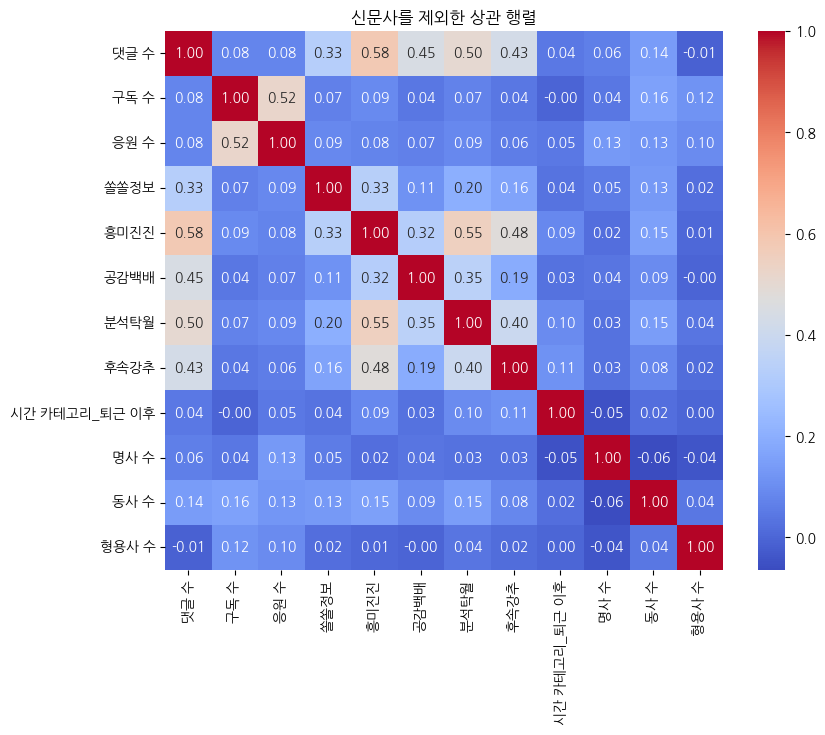

In [11]:
plt.rcParams['font.family'] = 'NanumGothic'

# '신문사' 종류를 제외한 변수들만 선택
features = df.copy()

# '신문사_'가 포함된 열 확인
columns_to_drop = [col for col in features.columns if '신문사_' in col]

# '신문사_'가 포함된 열 삭제
features.drop(columns=columns_to_drop, inplace= True)

# 변수들 간의 상관 행렬 계산
corr = features.corr()

# 상관 행렬 시각화
plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("신문사를 제외한 상관 행렬")
plt.show()

In [12]:
# 구독 수, 응원 수 의 상관계수가 높아서 두 변수를 합침
df['기자팔로워 수'] = (df['응원 수'] + df['구독 수']) / 2
df.drop(columns=['구독 수'], inplace=True)
df.drop(columns=['응원 수'], inplace=True)

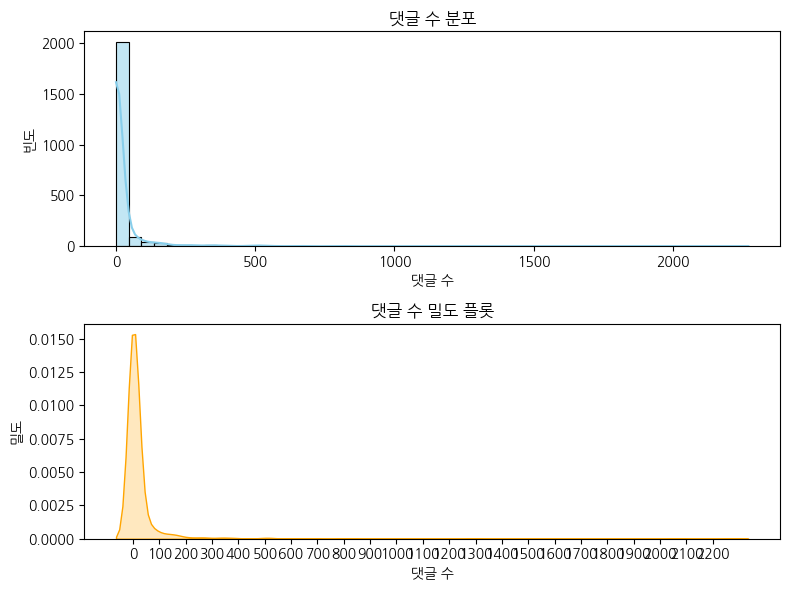

In [13]:
# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 히스토그램
plt.subplot(2, 1, 1)
sns.histplot(df['댓글 수'], bins=50, kde=True, color='skyblue')
plt.title('댓글 수 분포')
plt.xlabel('댓글 수')
plt.ylabel('빈도')

# 밀도 플롯
plt.subplot(2, 1, 2)
sns.kdeplot(df['댓글 수'], color='orange', shade=True)
plt.title('댓글 수 밀도 플롯')
plt.xlabel('댓글 수')
plt.ylabel('밀도')

# x 축 댓글 수 더 세밀하게 표시
plt.xticks(np.arange(min(df['댓글 수']), max(df['댓글 수'])+1, 100))

plt.tight_layout()
plt.show()

In [14]:
# 상위 33%와 66%에 해당하는 백분위수 계산
quantiles = df['댓글 수'].quantile([0.333, 0.666])

# 댓글 수를 상위 33%와 66%의 백분위수를 기준으로 나누기
df['댓글 구간'] = pd.cut(df['댓글 수'], bins=[-float('inf'), quantiles.iloc[0], quantiles.iloc[1], float('inf')], labels=['Low', 'Medium', 'High'])

# 결과 확인
df

,댓글 수,쏠쏠정보,흥미진진,공감백배,분석탁월,후속강추,신문사_JIBS,신문사_JTBC,신문사_KBS,신문사_MBC,...,신문사_한국경제,신문사_한국경제TV,신문사_한국일보,신문사_헤럴드경제,시간 카테고리_퇴근 이후,명사 수,동사 수,형용사 수,기자팔로워 수,댓글 구간
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,13,1,0,527.0,Low
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,0,0,1266.5,Low
5,15,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,8,1,0,1446.5,High
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,943.5,Low
7,6,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,904.5,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,5,2,0,986.0,Low
2381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,7,1,0,1149.0,Low
2382,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,8,2,0,508.5,Medium
2383,814,35,7,137,2,13,0,0,0,0,...,0,0,0,0,1,7,0,0,2721.0,High


Text(0, 0.5, '')

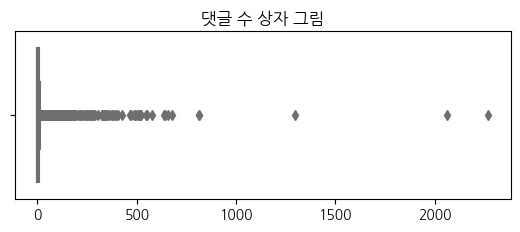

In [15]:
# 그래프 크기 설정

# 상자 그림(Boxplot) - 위
plt.subplot(2, 1, 1)
sns.boxplot(x='댓글 수', data=df, color='skyblue')
plt.title('댓글 수 상자 그림')
plt.xlabel('')
plt.ylabel('')

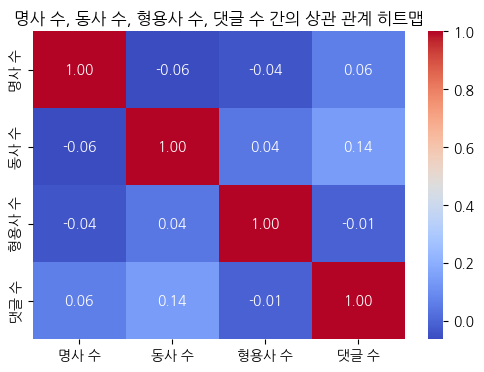

In [16]:
# 상관 히트맵
plt.figure(figsize=(6, 4))

corr_matrix = df[['명사 수', '동사 수', '형용사 수', '댓글 수']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('명사 수, 동사 수, 형용사 수, 댓글 수 간의 상관 관계 히트맵')
plt.show()

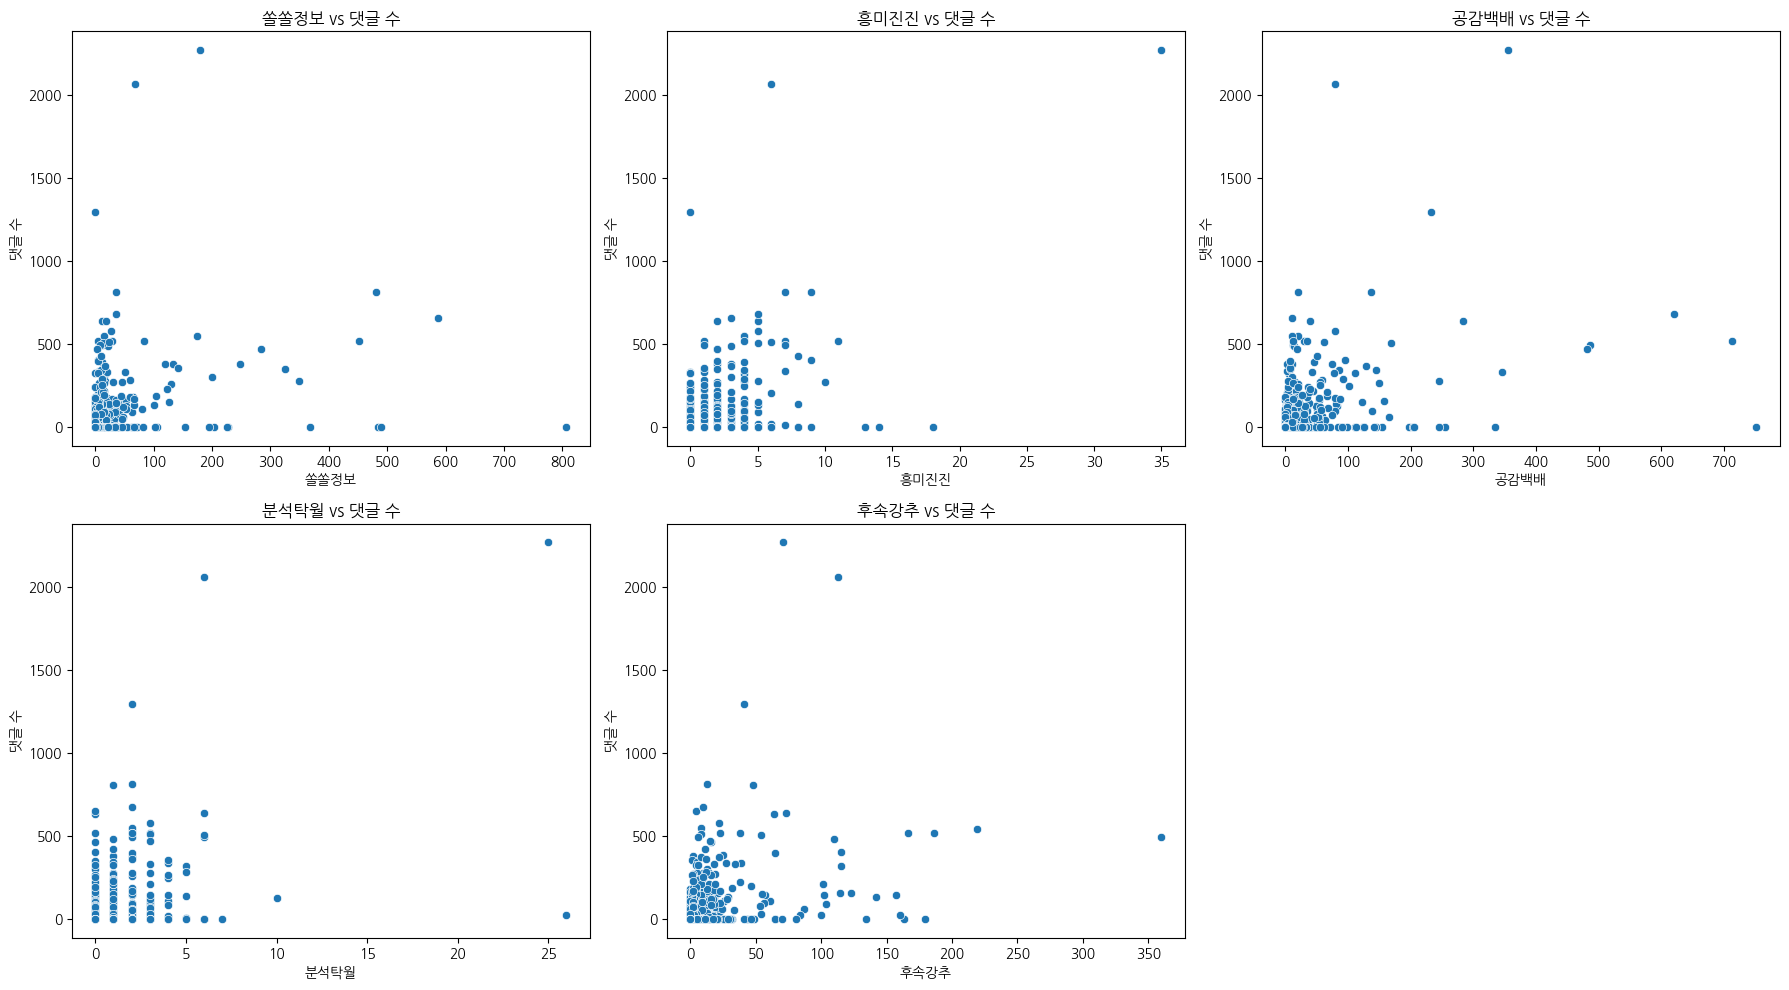

In [17]:
# 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 각 반응형 이모지 특성별 댓글 수와의 관계 시각화
sns.scatterplot(x='쏠쏠정보', y='댓글 수', data=df, ax=axes[0, 0])
axes[0, 0].set_title('쏠쏠정보 vs 댓글 수')

sns.scatterplot(x='흥미진진', y='댓글 수', data=df, ax=axes[0, 1])
axes[0, 1].set_title('흥미진진 vs 댓글 수')

sns.scatterplot(x='공감백배', y='댓글 수', data=df, ax=axes[0, 2])
axes[0, 2].set_title('공감백배 vs 댓글 수')

sns.scatterplot(x='분석탁월', y='댓글 수', data=df, ax=axes[1, 0])
axes[1, 0].set_title('분석탁월 vs 댓글 수')

sns.scatterplot(x='후속강추', y='댓글 수', data=df, ax=axes[1, 1])
axes[1, 1].set_title('후속강추 vs 댓글 수')

# 빈 서브플롯 제거
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

주요 신문사 기사 수: 1567
비주요 신문사 기사 수: 686
주요 신문사 댓글 수 총합: 37218
비주요 신문사 댓글 수 총합: 16230
댓글이 있는 주요 신문사 기사 수: 641
댓글이 있는 비주요 신문사 기사 수: 309


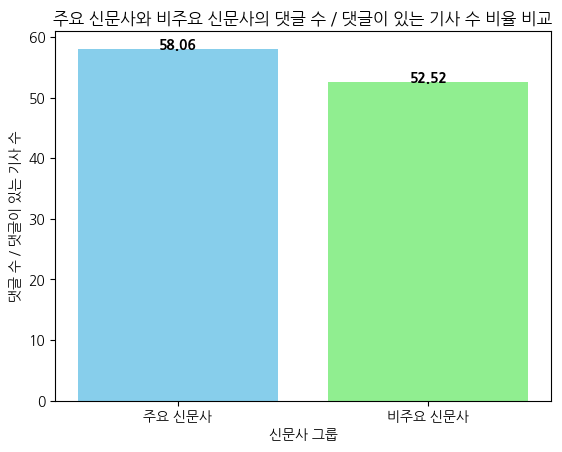

In [18]:
# 주요 신문사 목록 : 네이버에서 주요 신문사로 지정한 목록 가져옴 
major_newspapers = [
    '신문사_프레시안', '신문사_마이데일리', '신문사_서울경제', '신문사_MBC', '신문사_경향신문', '신문사_중앙일보',
    '신문사_YTN', '신문사_동아일보', '신문사_미디어오늘', '신문사_조선비즈', '신문사_오마이뉴스', '신문사_아이뉴스24',
    '신문사_아시아경제', '신문사_머니투데이', '신문사_디지털타임스', '신문사_매일경제', '신문사_해럴드경제', '신문사_한국경제',
    '신문사_국민일보', '신문사_SBS', '신문사_시사IN', '신문사_한국일보', '신문사_뉴스타파', '신문사_OSEN',
    '신문사_동아일보', '신문사_KBS', '신문사_뉴데일리', '신문사_MBN', '신문사_스포츠서울', '신문사_스포츠동아',
    '신문사_전자신문', '신문사_노컷뉴스', '신문사_JTBC', '신문사_스포츠조선', '신문사_일간스포츠', '신문사_서울신문',
    '신문사_파이낸셜뉴스', '신문사_이데일리', '신문사_연합뉴스', '신문사_데일리안', '신문사_세계일보', '신문사_한국경제TV',
    '신문사_한겨레'
]

# 데이터프레임에서 실제로 존재하는 주요 신문사 목록 필터링
existing_major_newspapers = [col for col in major_newspapers if col in df.columns]

# 데이터프레임 복사
df_copy = df.copy()

# 주요 신문사 열을 기반으로 'is_major' 열 생성
df_copy['is_major'] = df_copy[existing_major_newspapers].sum(axis=1) > 0

# 주요 신문사와 비주요 신문사 기사 수 계산
major_articles = df_copy['is_major'].sum()
minor_articles = len(df_copy) - major_articles

# 주요 신문사와 비주요 신문사 댓글 수 계산
major_comments = df_copy[df_copy['is_major']]['댓글 수'].sum()
minor_comments = df_copy[~df_copy['is_major']]['댓글 수'].sum()

# 댓글이 있는 주요 신문사와 비주요 신문사 기사 수 계산
major_articles_with_comments = df_copy[(df_copy['is_major']) & (df_copy['댓글 수'] > 0)].shape[0]
minor_articles_with_comments = df_copy[(~df_copy['is_major']) & (df_copy['댓글 수'] > 0)].shape[0]

# 결과 출력
print(f"주요 신문사 기사 수: {major_articles}")
print(f"비주요 신문사 기사 수: {minor_articles}")
print(f"주요 신문사 댓글 수 총합: {major_comments}")
print(f"비주요 신문사 댓글 수 총합: {minor_comments}")
print(f"댓글이 있는 주요 신문사 기사 수: {major_articles_with_comments}")
print(f"댓글이 있는 비주요 신문사 기사 수: {minor_articles_with_comments}")

# 댓글 수 / 댓글이 있는 기사 수 계산
major_ratio = major_comments / major_articles_with_comments
minor_ratio = minor_comments / minor_articles_with_comments

# 그래프 그리기
labels = ['주요 신문사', '비주요 신문사']
ratios = [major_ratio, minor_ratio]

plt.bar(labels, ratios, color=['skyblue', 'lightgreen'])
plt.title('주요 신문사와 비주요 신문사의 댓글 수 / 댓글이 있는 기사 수 비율 비교')
plt.xlabel('신문사 그룹')
plt.ylabel('댓글 수 / 댓글이 있는 기사 수')
for i, v in enumerate(ratios):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()


In [19]:
## 간단한 반응 예측 모델 설계 - 앙상블
# 데이터셋 분할
X1 = df[['명사 수', '동사 수', '형용사 수']]
X2 = df[['쏠쏠정보', '흥미진진', '공감백배', '분석탁월', '후속강추']]
X3 = df[['기자팔로워 수'] + [col for col in df.columns if '신문사_' in col]]
y = df['댓글 구간']

# 데이터 분할
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test = train_test_split(X2, test_size=0.2, random_state=42)
X3_train, X3_test = train_test_split(X3, test_size=0.2, random_state=42)

# 각 모델 학습
model1 = RandomForestClassifier()
model1.fit(X1_train, y_train)

model2 = GradientBoostingClassifier()
model2.fit(X2_train, y_train)

model3 = RandomForestClassifier()
model3.fit(X3_train, y_train)

# 각 모델의 예측
y_pred1 = model1.predict(X1_test)
y_pred2 = model2.predict(X2_test)
y_pred3 = model3.predict(X3_test)

# 앙상블을 위한 예측 결과 합치기
y_pred_ensemble = []
for pred1, pred2, pred3 in zip(y_pred1, y_pred2, y_pred3):
    # 각 모델의 예측 결과를 다수결로 결합
    ensemble_vote = max(set([pred1, pred2, pred3]), key=[pred1, pred2, pred3].count)
    y_pred_ensemble.append(ensemble_vote)

# 정확도 평가
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("앙상블 모델의 정확도:", accuracy_ensemble)


앙상블 모델의 정확도: 0.6297117516629712


              precision    recall  f1-score   support

        High       0.57      0.51      0.54       140
         Low       0.65      0.83      0.73       256
      Medium       0.00      0.00      0.00        55

    accuracy                           0.63       451
   macro avg       0.41      0.45      0.42       451
weighted avg       0.55      0.63      0.58       451



C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


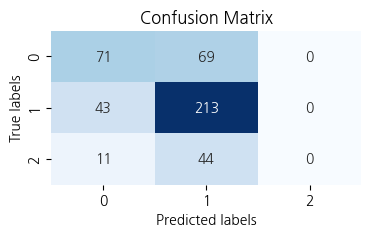

In [20]:
# 분류 리포트 출력
print(classification_report(y_test, y_pred_ensemble))

# 혼동 행렬 생성
conf_mat = confusion_matrix(y_test, y_pred_ensemble)

# 혼동 행렬 히트맵 그리기
plt.figure(figsize=(4, 2))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 가설검정

### 가설 1 : 명사 위주로 문장을 구성하여 제목으로 쓰면 사람들이 더 많이 반응할 것이다.

In [21]:
# 가설1 검증에 쓰일 데이터프레임
df_가설_1 = df[['명사 수','댓글 구간']].copy()

# Low, Medium, High를 숫자로 변환
df_가설_1['댓글 구간'] = df_가설_1['댓글 구간'].map({'Low': 0, 'Medium': 1, 'High': 2})

# 특징 변수와 타겟 변수 분리
X = df_가설_1[['명사 수']]
y = df_가설_1['댓글 구간']

In [22]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# 로지스틱 회귀 모델 학습
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [29]:
# 예측
y_pred = logreg_model.predict(X_test_scaled)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("분류 보고서:\n", class_report)

분류 보고서:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73       256
           1       0.00      0.00      0.00        55
           2       1.00      0.01      0.03       140

    accuracy                           0.57       451
   macro avg       0.52      0.34      0.25       451
weighted avg       0.63      0.57      0.42       451



C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


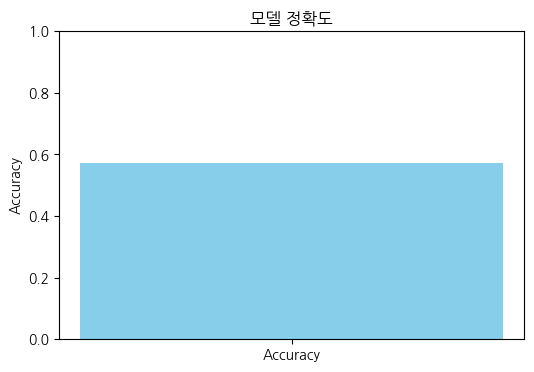

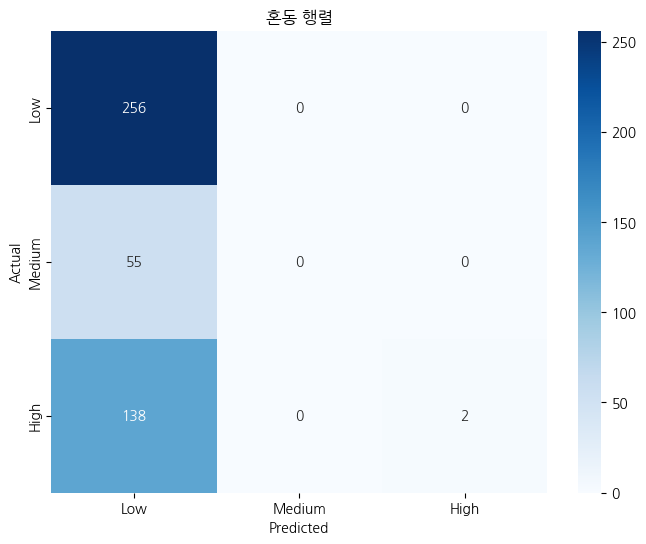

In [30]:
# 정확도 막대그래프
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('모델 정확도')
plt.show()

# 혼동 행렬 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('혼동 행렬')
plt.show()

In [31]:
# High, Medium, Low 그룹 나누기
high_group = df_가설_1[df_가설_1['댓글 구간'] == 2]['명사 수']
medium_group = df_가설_1[df_가설_1['댓글 구간'] == 1]['명사 수']
low_group = df_가설_1[df_가설_1['댓글 구간'] == 0]['명사 수']

# ANOVA 수행
f_stat, p_value = f_oneway(high_group, medium_group, low_group)

# 결과 출력
print("ANOVA 결과 (명사 수): F =", f_stat, ", p =", p_value)

if p_value < 0.05:
    print("결과적으로 p-value가 유의수준 0.05보다 작으므로 그룹 간의 평균 반응 수에 통계적으로 유의미한 차이가 있다.")
else:
    print("결과적으로 p-value가 유의수준 0.05보다 크므로 그룹 간의 평균 반응 수에 통계적으로 유의미한 차이가 없다.")

ANOVA 결과 (명사 수): F = 9.939659325411654 , p = 5.037545235286215e-05
결과적으로 p-value가 유의수준 0.05보다 작으므로 그룹 간의 평균 반응 수에 통계적으로 유의미한 차이가 있다.


### 가설 2 : 정보를 주는 기사가 분석이 탁월한 기사, 공감이 가는 기사, 흥미진진한 기사들 보다 사람들의 관심을 끌 것이다.

In [32]:
df_가설_2 = df[['쏠쏠정보', '흥미진진', '공감백배', '분석탁월', '후속강추','댓글 구간' ]].copy()

In [33]:
df_가설_2['댓글 구간'] = df_가설_2['댓글 구간'].map({'Low': 0, 'Medium': 1, 'High': 2})

C:\Users\kjeng\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


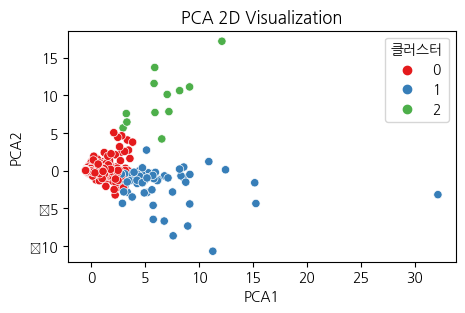

C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\kjeng\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\kjeng\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


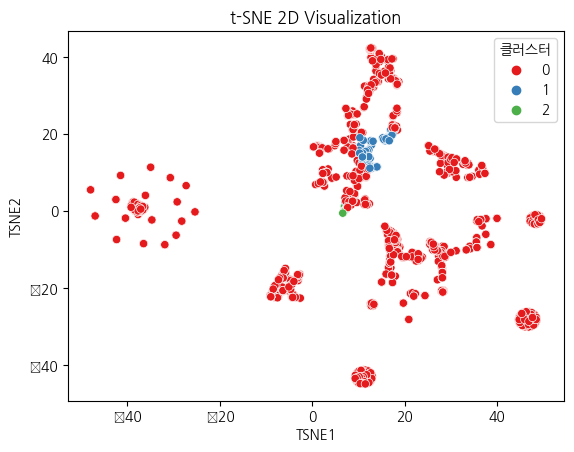

ANOVA 결과 (댓글 수): F = 21.718459080301145 , p = 4.546568879853064e-10


In [34]:
# 사용할 열 선택
features = ['쏠쏠정보', '흥미진진', '공감백배', '분석탁월', '후속강추']
target = ['댓글 구간']

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_가설_2[features])

# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df_가설_2['클러스터'] = kmeans.fit_predict(scaled_features)

# PCA를 사용한 2차원 시각화
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

df_가설_2['PCA1'] = pca_components[:, 0]
df_가설_2['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(5, 3))
sns.scatterplot(x='PCA1', y='PCA2', hue='클러스터', palette='Set1', data=df_가설_2)
plt.title('PCA 2D Visualization')
plt.show()

# t-SNE를 사용한 2차원 시각화
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)

df_가설_2['TSNE1'] = tsne_components[:, 0]
df_가설_2['TSNE2'] = tsne_components[:, 1]

sns.scatterplot(x='TSNE1', y='TSNE2', hue='클러스터', palette='Set1', data=df_가설_2)
plt.title('t-SNE 2D Visualization')
plt.show()

# ANOVA 검증 (예시)
from scipy.stats import f_oneway

anova_comments = f_oneway(
    df_가설_2[df_가설_2['클러스터'] == 0]['댓글 구간'],
    df_가설_2[df_가설_2['클러스터'] == 1]['댓글 구간'],
    df_가설_2[df_가설_2['클러스터'] == 2]['댓글 구간']
)

print("ANOVA 결과 (댓글 수): F =", anova_comments.statistic, ", p =", anova_comments.pvalue)

PCA 2D Visualizations는 PCA를 통해 2차원으로 차원을 축소한 후 K-means 클러스터링 결과를 시각화 한것이다. 시각화 결과 데이터 포인터들이 세 개의 클러스터로 나누어지긴 하지만, 경계가 뚜렷하지 않다. t-SNE 2D visualization는 고차원의 데이터를 2차원으로 축소하여 클러스터 간의 분포를 보여주는데 여기서도 클러스터 간의 명확한 경계가 뚜렷하지 않다.

### 가설 3 : 기사를 읽고 반응하는데 있어서 신문사는 크게 중요하지 않다.

In [35]:
# 
df['총 반응이모지 수'] = df['쏠쏠정보'] + df['흥미진진'] + df['공감백배']+df['분석탁월'] + df['후속강추']
df_가설_3 = df[['총 반응이모지 수']+ ['댓글 구간'] + ['댓글 수'] + [col for col in df.columns if '신문사_' in col]]

# 주요 신문사 목록
major_newspapers = [
    '신문사_프레시안', '신문사_마이데일리', '신문사_서울경제', '신문사_MBC', '신문사_경향신문', '신문사_중앙일보',
    '신문사_YTN', '신문사_동아일보', '신문사_미디어오늘', '신문사_조선비즈', '신문사_오마이뉴스', '신문사_아이뉴스24',
    '신문사_아시아경제', '신문사_머니투데이', '신문사_디지털타임스', '신문사_매일경제', '신문사_해럴드경제', '신문사_한국경제',
    '신문사_국민일보', '신문사_SBS', '신문사_시사IN', '신문사_한국일보', '신문사_뉴스타파', '신문사_OSEN',
    '신문사_동아일보', '신문사_KBS', '신문사_뉴데일리', '신문사_MBN', '신문사_스포츠서울', '신문사_스포츠동아',
    '신문사_전자신문', '신문사_JTBC', '신문사_스포츠조선', '신문사_일간스포츠', '신문사_서울신문',
    '신문사_파이낸셜뉴스', '신문사_이데일리', '신문사_연합뉴스', '신문사_데일리안', '신문사_한국경제TV',
    '신문사_한겨레'
]

# 데이터프레임에서 실제로 존재하는 주요 신문사 목록 필터링
existing_major_newspapers = [col for col in major_newspapers if col in df_가설_3.columns]

# 주요 신문사 열을 기반으로 'is_major' 열 생성
df_가설_3['is_major'] = df_가설_3[existing_major_newspapers].sum(axis=1) > 0

# 댓글 수 * 1.2 + 총 반응 이모지 수 = 반응
df_가설_3['반응'] = df_가설_3['댓글 수'] + 1.2*df_가설_3['총 반응이모지 수']

# 필요없는 열 탈락
df_가설_3.drop(columns=['댓글 구간', '댓글 수', '총 반응이모지 수'], inplace=True)

# '신문사_'가 포함된 열 확인
columns_to_drop = [col for col in df_가설_3.columns if '신문사_' in col]

# '신문사_'가 포함된 열 삭제
df_가설_3.drop(columns=columns_to_drop, inplace= True)

C:\Users\kjeng\AppData\Local\Temp\ipykernel_48548\3250655928.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_가설_3['is_major'] = df_가설_3[existing_major_newspapers].sum(axis=1) > 0
C:\Users\kjeng\AppData\Local\Temp\ipykernel_48548\3250655928.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_가설_3['반응'] = df_가설_3['댓글 수'] + 1.2*df_가설_3['총 반응이모지 수']
C:\Users\kjeng\AppData\Local\Temp\ipykernel_48548\3250655928.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [36]:
# 주요신문사와 비주요신문사로 데이터 분할
major_group = df_가설_3[df_가설_3['is_major'] == True]
non_major_group = df_가설_3[df_가설_3['is_major'] == False]

In [37]:
major_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 2384
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   is_major  1451 non-null   bool   
 1   반응        1451 non-null   float64
dtypes: bool(1), float64(1)
memory usage: 24.1 KB


In [38]:
# 댓글 수에 대한 t-test
t_stat, p_value = ttest_ind(major_group['반응'], non_major_group['반응'])
print("반응에 대한 t-test 결과: t =", t_stat, ", p =", p_value)

반응에 대한 t-test 결과: t = -0.6656581140692669 , p = 0.505697854198262


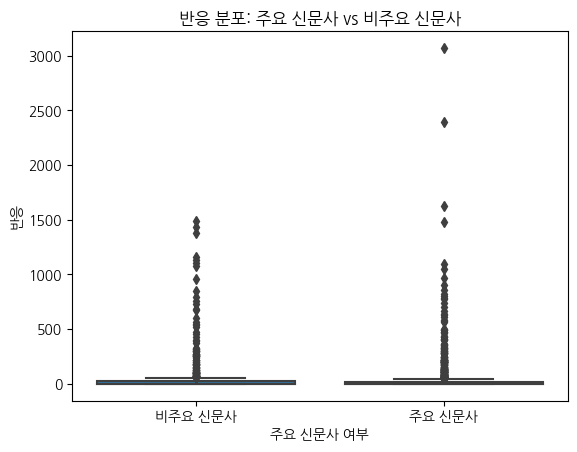

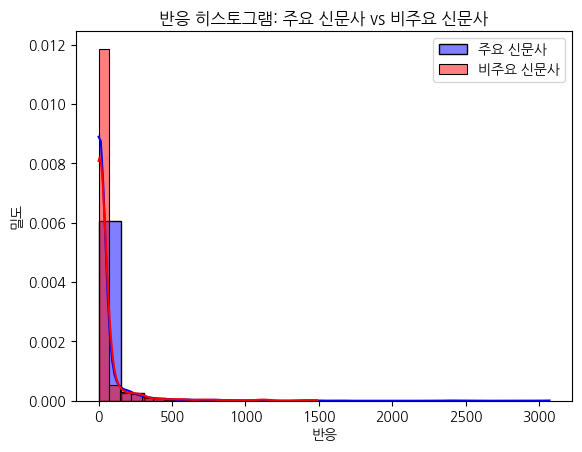

T-test 결과: t-statistic = -0.6706, p-value = 0.5025
결과: 주류 신문사와 비주류 신문사 간의 반응 차이가 통계적으로 유의미하지 않습니다.
결론: 기사를 읽고 반응하는 데 있어서 주류 신문사와 비주류 신문사는 크게 중요하지 않습니다.


In [39]:
# 주요 신문사와 비주요 신문사로 데이터 분리
major_reactions = df_가설_3[df_가설_3['is_major'] == True]['반응']
non_major_reactions = df_가설_3[df_가설_3['is_major'] == False]['반응']

# T-test를 통해 두 그룹 간의 반응 차이 검정
t_stat, p_value = ttest_ind(major_reactions, non_major_reactions, equal_var=False)

# 결과 시각화: 박스플롯
sns.boxplot(x='is_major', y='반응', data=df_가설_3)
plt.title('반응 분포: 주요 신문사 vs 비주요 신문사')
plt.xlabel('주요 신문사 여부')
plt.ylabel('반응')
plt.xticks([0, 1], ['비주요 신문사', '주요 신문사'])
plt.show()

# 결과 시각화: 히스토그램
sns.histplot(major_reactions, color='blue', label='주요 신문사', kde=True, stat="density", bins=20)
sns.histplot(non_major_reactions, color='red', label='비주요 신문사', kde=True, stat="density", bins=20)
plt.title('반응 히스토그램: 주요 신문사 vs 비주요 신문사')
plt.xlabel('반응')
plt.ylabel('밀도')
plt.legend()
plt.show()


# T-test 결과 출력
print(f"T-test 결과: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# 결과 해석 및 결론
if p_value < 0.05:
    print("결과: 주류 신문사와 비주류 신문사 간의 반응 차이가 통계적으로 유의미합니다.")
    print("결론: 주류 신문사와 비주류 신문사에 따라 기사의 반응이 달라질 수 있습니다.")
else:
    print("결과: 주류 신문사와 비주류 신문사 간의 반응 차이가 통계적으로 유의미하지 않습니다.")
    print("결론: 기사를 읽고 반응하는 데 있어서 주류 신문사와 비주류 신문사는 크게 중요하지 않습니다.")
